In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)

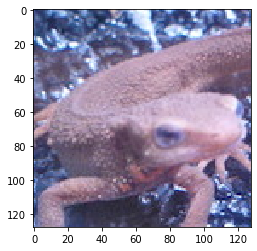

In [2]:
# Original image
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Task 11: Smoothing Filter

In [3]:
def smoothing_filter(img, size):
    height, width, channel = img.shape
    out = img.copy()
    
    pad = size // 2
    out = np.pad(out, [(pad, pad), (pad, pad), (0, 0)], "constant", constant_values=(0, 0))
    
    tmp = out.copy()
    
    for h in range(height):
        for w in range(width):
            for c in range(channel):
                out[h+pad, w+pad, c] = np.average(tmp[h:h+size, w:w+size, c])
    
    out = out[pad:pad+height, pad:pad+width, :].astype(np.uint8)
    
    return out

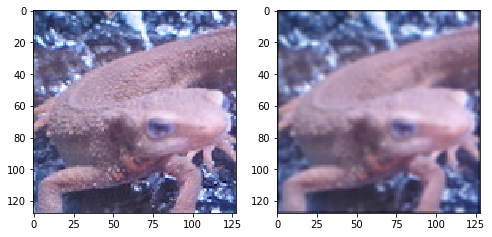

In [4]:
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(smoothing_filter(img, 3))

# Task 12: Motion Filter

In [5]:
def filter2D(img, size, kernel):
    height, width, channel = img.shape
    out = img.copy()
    
    pad = size // 2
    out = np.pad(out, [(pad, pad), (pad, pad), (0, 0)], "constant", constant_values=(0, 0))
    
    tmp = out.copy()
    
    for h in range(height):
        for w in range(width):
            for c in range(channel):
                out[h+pad, w+pad, c] = np.sum(tmp[h:h+size, w:w+size, c] * kernel)
    
    out = out[pad:pad+height, pad:pad+width, :].astype(np.uint8)
    
    return out

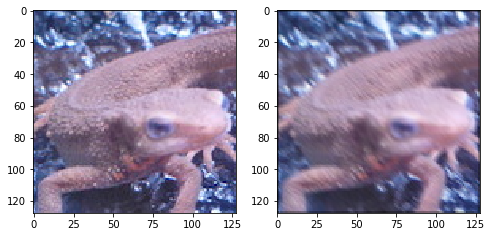

In [6]:
motion_kernel = np.array([
    [1/3, 0, 0],
    [0, 1/3, 0],
    [0, 0, 1/3]
]).astype(np.float32)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(filter2D(img, 3, motion_kernel))

# Task 13: Max-Min Filter

In [7]:
def max_min_filter(img, size=3):
    height, width, channel = img.shape
    out = img.copy()
    
    pad = size // 2
    out = np.pad(out, [(pad, pad), (pad, pad), (0, 0)], "constant", constant_values=(0, 0))
    
    tmp = out.copy()
    
    for h in range(height):
        for w in range(width):
            for c in range(channel):
                out[h+pad, w+pad, c] = np.max(tmp[h:h+size, w:w+size, c]) - np.min(tmp[h:h+size, w:w+size, c])
    
    out = out[pad:height, pad:width, :].astype(np.uint8)
    
    return out

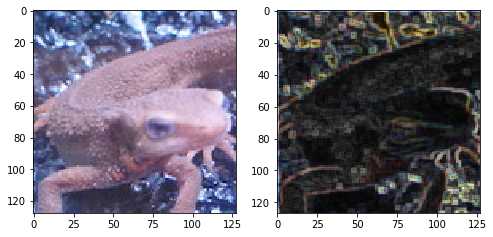

In [8]:
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(max_min_filter(img, 3))

# Task 14: Differential Filter

In [9]:
def vert_diff_filter(img, size):
    height, width = img.shape[0], img.shape[1]
    out = img.copy()
    
    pad = size // 2
    out = np.pad(out, [(pad, pad), (pad, pad)], "constant", constant_values=(0, 0))
    assert out.shape == (height+pad*2, width+pad*2)
    
    vert_kernel = [[0., -1., 0.],[0., 1., 0.],[0., 0., 0.]]
    
    tmp = out.copy()
    
    for h in range(height):
        for w in range(width):
            out[h+pad, w+pad] = max(np.sum(vert_kernel * (tmp[h:h+size, w:w+size])), 0)
            
    print(len(np.where(out < 0)))
    out = out[pad:pad+height, pad:pad+width].astype(np.uint8)
    
    return out

2


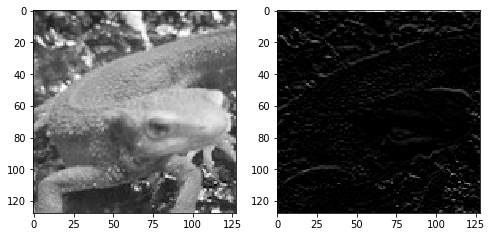

In [10]:
# Vertical diff
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(vert_diff_filter(img, 3), cmap="gray")

# Task 15: Prewitt Filter

In [19]:
def prewitt_filter(img, size):
    height, width = img.shape[0], img.shape[1]
    out_vert = img.copy()
    out_horiz = img.copy()
    
    pad = size // 2
    out_vert = np.pad(out_vert, [(pad, pad), (pad, pad)], "constant", constant_values=(0, 0))
    out_horiz = np.pad(out_horiz, [(pad, pad), (pad, pad)], "constant", constant_values=(0, 0))
    
    vert_kernel = [[1., 1., 1.],[0., 0., 0.],[-1., -1., -1.]]
    horiz_kernel = [[1., 0., -1.], [1., 0., -1.], [1., 0., -1.]]
    
    tmp = out_vert.copy()
    
    for h in range(height):
        for w in range(width):
            out_vert[h+pad, w+pad] = max(np.sum(vert_kernel * (tmp[h:h+size, w:w+size])), 0)
            out_horiz[h+pad, w+pad] = max(np.sum(horiz_kernel * (tmp[h:h+size, w:w+size])), 0)
            
    out_vert = out_vert[pad:pad+height, pad:pad+width].astype(np.uint8)
    out_horiz = out_horiz[pad:pad+height, pad:pad+width].astype(np.uint8)
    
    return out_vert, out_horiz

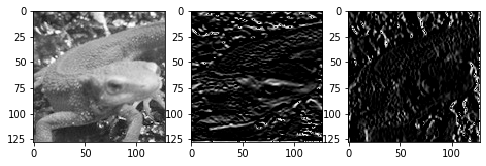

In [20]:
img = cv2.imread('imori.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,3)
ax[0].imshow(gray, cmap="gray")
ax[1].imshow(prewitt_filter(gray, 3)[0], cmap="gray")
ax[2].imshow(prewitt_filter(gray, 3)[1], cmap="gray")